In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('S:\ML\Datasets\Classification/BankNote_Authentication.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### Checking Data Information

In [3]:
df.shape

(1372, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [5]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [6]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


### Checking Missing values

In [7]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

No missing values found.

In [8]:
df.isnull()

,variance,skewness,curtosis,entropy,class
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1367,False,False,False,False,False
1368,False,False,False,False,False
1369,False,False,False,False,False
1370,False,False,False,False,False


<AxesSubplot:>

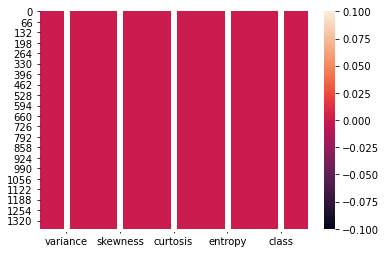

In [9]:
sns.heatmap(df.isnull(),annot=True)

### Checking Class Column for balancing

In [10]:
df['class'].unique()

array([0, 1], dtype=int64)

In [11]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

F:\Installed\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

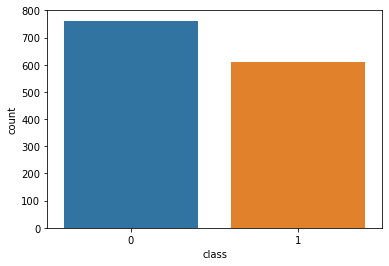

In [12]:
sns.countplot(df['class'])

data is perfectly balanced.

### Implementing Adaboost Classifier

In [13]:
x=df.drop(columns='class')
y=df['class']

In [14]:
## Spliting data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [15]:
## Model Training/fitting
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(n_estimators=50,random_state=0)
model.fit(xtrain,ytrain)

AdaBoostClassifier(random_state=0)

In [16]:
## Model Testing
ypred=model.predict(xtest)

Accuracy: 0.9963636363636363
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       157
           1       1.00      0.99      1.00       118

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



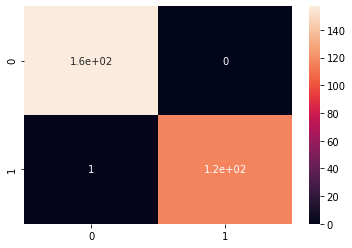

In [17]:
## Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
print('Accuracy:',accuracy_score(ytest,ypred))
print(classification_report(ytest,ypred))

##### As we got good accuracy no need of hypertuning parameters

In [18]:
help(model)

Help on AdaBoostClassifier in module sklearn.ensemble._weight_boosting object:

class AdaBoostClassifier(sklearn.base.ClassifierMixin, BaseWeightBoosting)
 |  AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
 |  
 |  An AdaBoost classifier.
 |  
 |  An AdaBoost [1] classifier is a meta-estimator that begins by fitting a
 |  classifier on the original dataset and then fits additional copies of the
 |  classifier on the same dataset but where the weights of incorrectly
 |  classified instances are adjusted such that subsequent classifiers focus
 |  more on difficult cases.
 |  
 |  This class implements the algorithm known as AdaBoost-SAMME [2].
 |  
 |  Read more in the :ref:`User Guide <adaboost>`.
 |  
 |  .. versionadded:: 0.14
 |  
 |  Parameters
 |  ----------
 |  base_estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.
 |      Support for sample weighting is requ